<a href="https://colab.research.google.com/github/imnadiarasheed/Machine-Learning/blob/main/SQE_P2(OverSampling_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import statistics
import missingno as msno
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [353]:
fulldata=pd.read_csv('drive/MyDrive/diabetes.csv')
fulldata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Preprocessing**

**Outliers Detection**

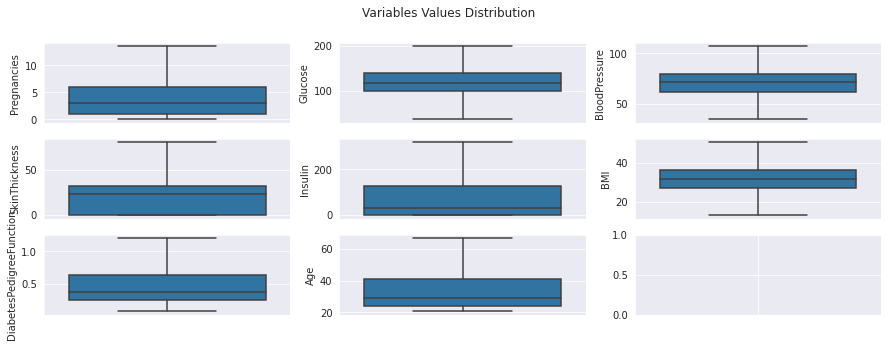

In [363]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharex=True)
fig.suptitle('Variables Values Distribution')

sns.boxplot(ax=axes[0, 0], y=fulldata['Pregnancies'])
sns.boxplot(ax=axes[0, 1], y=fulldata['Glucose'])
sns.boxplot(ax=axes[0, 2], y=fulldata['BloodPressure'])
sns.boxplot(ax=axes[1, 0], y=fulldata['SkinThickness'])
sns.boxplot(ax=axes[1, 1], y=fulldata['Insulin'])
sns.boxplot(ax=axes[1, 2], y=fulldata['BMI'])
sns.boxplot(ax=axes[2, 0], y=fulldata['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[2, 1], y=fulldata['Age'])

**Outliers Removal**

In [355]:
Pregnancies_q3 = fulldata["Pregnancies"].quantile(0.75)  
Pregnancies_q1 = fulldata["Pregnancies"].quantile(0.25)
print(Pregnancies_q3), print(Pregnancies_q1)

Pregnancies_IQR = Pregnancies_q3 - Pregnancies_q1
Pregnancies_low_limit = Pregnancies_q1 - (Pregnancies_IQR * 1.5)
Pregnancies_upp_limit = Pregnancies_q3 + (Pregnancies_IQR * 1.5)

print(Pregnancies_IQR), print(Pregnancies_upp_limit), print(Pregnancies_low_limit)
print(fulldata['Pregnancies'].max()), print(fulldata['Pregnancies'].min())

fulldata.loc[fulldata['Pregnancies'] > Pregnancies_upp_limit, 'Pregnancies'] = Pregnancies_upp_limit
fulldata.loc[fulldata['Pregnancies'] < Pregnancies_low_limit, 'Pregnancies'] = Pregnancies_low_limit
fulldata['Pregnancies'].max(), fulldata['Pregnancies'].min()

6.0
1.0
5.0
13.5
-6.5
17
0


(13.5, 0.0)

In [356]:
Glucose_q3 = fulldata["Glucose"].quantile(0.75)  
Glucose_q1 = fulldata["Glucose"].quantile(0.25)
print(Glucose_q3), print(Glucose_q1)

Glucose_IQR = Glucose_q3 - Glucose_q1
Glucose_low_limit = Glucose_q1 - (Glucose_IQR * 1.5)
Glucose_upp_limit = Glucose_q3 + (Glucose_IQR * 1.5)

print(Glucose_IQR), print(Glucose_upp_limit), print(Glucose_low_limit)
print(fulldata['Glucose'].max()), print(fulldata['Glucose'].min())

fulldata.loc[fulldata['Glucose'] > Glucose_upp_limit, 'Glucose'] = Glucose_upp_limit
fulldata.loc[fulldata['Glucose'] < Glucose_low_limit, 'Glucose'] = Glucose_low_limit
fulldata['Glucose'].max(), fulldata['Glucose'].min()

140.25
99.0
41.25
202.125
37.125
199
0


(199.0, 37.125)

In [357]:
BloodPressure_q3 = fulldata["BloodPressure"].quantile(0.75)  
BloodPressure_q1 = fulldata["BloodPressure"].quantile(0.25)
print(BloodPressure_q3), print(BloodPressure_q1)

BloodPressure_IQR = BloodPressure_q3 - BloodPressure_q1
BloodPressure_low_limit = BloodPressure_q1 - (BloodPressure_IQR * 1.5)
BloodPressure_upp_limit = BloodPressure_q3 + (BloodPressure_IQR * 1.5)

print(BloodPressure_IQR), print(BloodPressure_low_limit), print(BloodPressure_upp_limit)
fulldata['BloodPressure'].max(), fulldata['BloodPressure'].min()

fulldata.loc[fulldata['BloodPressure'] > BloodPressure_upp_limit, 'BloodPressure'] = BloodPressure_upp_limit
fulldata.loc[fulldata['BloodPressure'] < BloodPressure_low_limit, 'BloodPressure'] = BloodPressure_low_limit
fulldata['BloodPressure'].max(), fulldata['BloodPressure'].min()

80.0
62.0
18.0
35.0
107.0


(107, 35)

In [358]:
SkinThickness_q3 = fulldata["SkinThickness"].quantile(0.75)  
SkinThickness_q1 = fulldata["SkinThickness"].quantile(0.25)
print(SkinThickness_q3), print(SkinThickness_q1)

SkinThickness_IQR = SkinThickness_q3 - SkinThickness_q1
SkinThickness_low_limit = SkinThickness_q1 - (SkinThickness_IQR * 1.5)
SkinThickness_upp_limit = SkinThickness_q3 + (SkinThickness_IQR * 1.5)

print(SkinThickness_IQR), print(SkinThickness_low_limit), print(SkinThickness_upp_limit)
fulldata['SkinThickness'].max(), fulldata['SkinThickness'].min()

fulldata.loc[fulldata['SkinThickness'] > SkinThickness_upp_limit, 'SkinThickness'] = SkinThickness_upp_limit
fulldata.loc[fulldata['SkinThickness'] < SkinThickness_low_limit, 'SkinThickness'] = SkinThickness_low_limit
fulldata['SkinThickness'].max(), fulldata['SkinThickness'].min()

32.0
0.0
32.0
-48.0
80.0


(80, 0)

In [359]:
Insulin_q3 = fulldata["Insulin"].quantile(0.75)  
Insulin_q1 = fulldata["Insulin"].quantile(0.25)
print(Insulin_q3), print(Insulin_q1)

Insulin_IQR = Insulin_q3 - Insulin_q1
Insulin_low_limit = Insulin_q1 - (Insulin_IQR * 1.5)
Insulin_upp_limit = Insulin_q3 + (Insulin_IQR * 1.5)

print(Insulin_IQR), print(Insulin_low_limit), print(Insulin_upp_limit)
fulldata['Insulin'].max(), fulldata['Insulin'].min()

fulldata.loc[fulldata['Insulin'] > Insulin_upp_limit, 'Insulin'] = Insulin_upp_limit
fulldata.loc[fulldata['Insulin'] < Insulin_low_limit, 'Insulin'] = Insulin_low_limit
fulldata['Insulin'].max(), fulldata['Insulin'].min()

127.25
0.0
127.25
-190.875
318.125


(318.125, 0.0)

In [360]:
BMI_q3 = fulldata["BMI"].quantile(0.75)  
BMI_q1 = fulldata["BMI"].quantile(0.25)
print(BMI_q3), print(BMI_q1)

BMI_IQR = BMI_q3 - BMI_q1
BMI_low_limit = BMI_q1 - (BMI_IQR * 1.5)
BMI_upp_limit = BMI_q3 + (BMI_IQR * 1.5)

print(BMI_IQR), print(BMI_upp_limit), print(BMI_low_limit)
print(fulldata['BMI'].max()), print(fulldata['BMI'].min())

fulldata.loc[fulldata['BMI'] > BMI_upp_limit, 'BMI'] = BMI_upp_limit
fulldata.loc[fulldata['BMI'] < BMI_low_limit, 'BMI'] = BMI_low_limit
fulldata['BMI'].max(), fulldata['BMI'].min()

36.6
27.3
9.3
50.550000000000004
13.35
67.1
0.0


(50.550000000000004, 13.35)

In [361]:
DiabetesPedigreeFunction_q3 = fulldata["DiabetesPedigreeFunction"].quantile(0.75)  
DiabetesPedigreeFunction_q1 = fulldata["DiabetesPedigreeFunction"].quantile(0.25)
print(DiabetesPedigreeFunction_q3), print(DiabetesPedigreeFunction_q1)

DiabetesPedigreeFunction_IQR = DiabetesPedigreeFunction_q3 - DiabetesPedigreeFunction_q1
DiabetesPedigreeFunction_low_limit = DiabetesPedigreeFunction_q1 - (DiabetesPedigreeFunction_IQR * 1.5)
DiabetesPedigreeFunction_upp_limit = DiabetesPedigreeFunction_q3 + (DiabetesPedigreeFunction_IQR * 1.5)

print(DiabetesPedigreeFunction_IQR), print(DiabetesPedigreeFunction_upp_limit), print(DiabetesPedigreeFunction_low_limit)
print(fulldata['DiabetesPedigreeFunction'].max()), print(fulldata['DiabetesPedigreeFunction'].min())

fulldata.loc[fulldata['DiabetesPedigreeFunction'] > DiabetesPedigreeFunction_upp_limit, 'DiabetesPedigreeFunction'] = DiabetesPedigreeFunction_upp_limit
fulldata.loc[fulldata['DiabetesPedigreeFunction'] < DiabetesPedigreeFunction_low_limit, 'DiabetesPedigreeFunction'] = DiabetesPedigreeFunction_low_limit
fulldata['DiabetesPedigreeFunction'].max(), fulldata['DiabetesPedigreeFunction'].min()

0.62625
0.24375
0.38249999999999995
1.2
-0.32999999999999996
2.42
0.078


(1.2, 0.078)

In [362]:
Age_q3 = fulldata["Age"].quantile(0.75)  
Age_q1 = fulldata["Age"].quantile(0.25)
print(Age_q3), print(Age_q1)

Age_IQR = Age_q3 - Age_q1
Age_low_limit = Age_q1 - (Age_IQR * 1.5)
Age_upp_limit = Age_q3 + (Age_IQR * 1.5)

print(Age_IQR), print(Age_upp_limit), print(Age_low_limit)
print(fulldata['Age'].max()), print(fulldata['Age'].min())

fulldata.loc[fulldata['Age'] > Age_upp_limit, 'Age'] = Age_upp_limit
fulldata.loc[fulldata['Age'] < Age_low_limit, 'Age'] = Age_low_limit
fulldata['Age'].max(), fulldata['Age'].min()

41.0
24.0
17.0
66.5
-1.5
81
21


(66.5, 21.0)

**Data Cleaning**

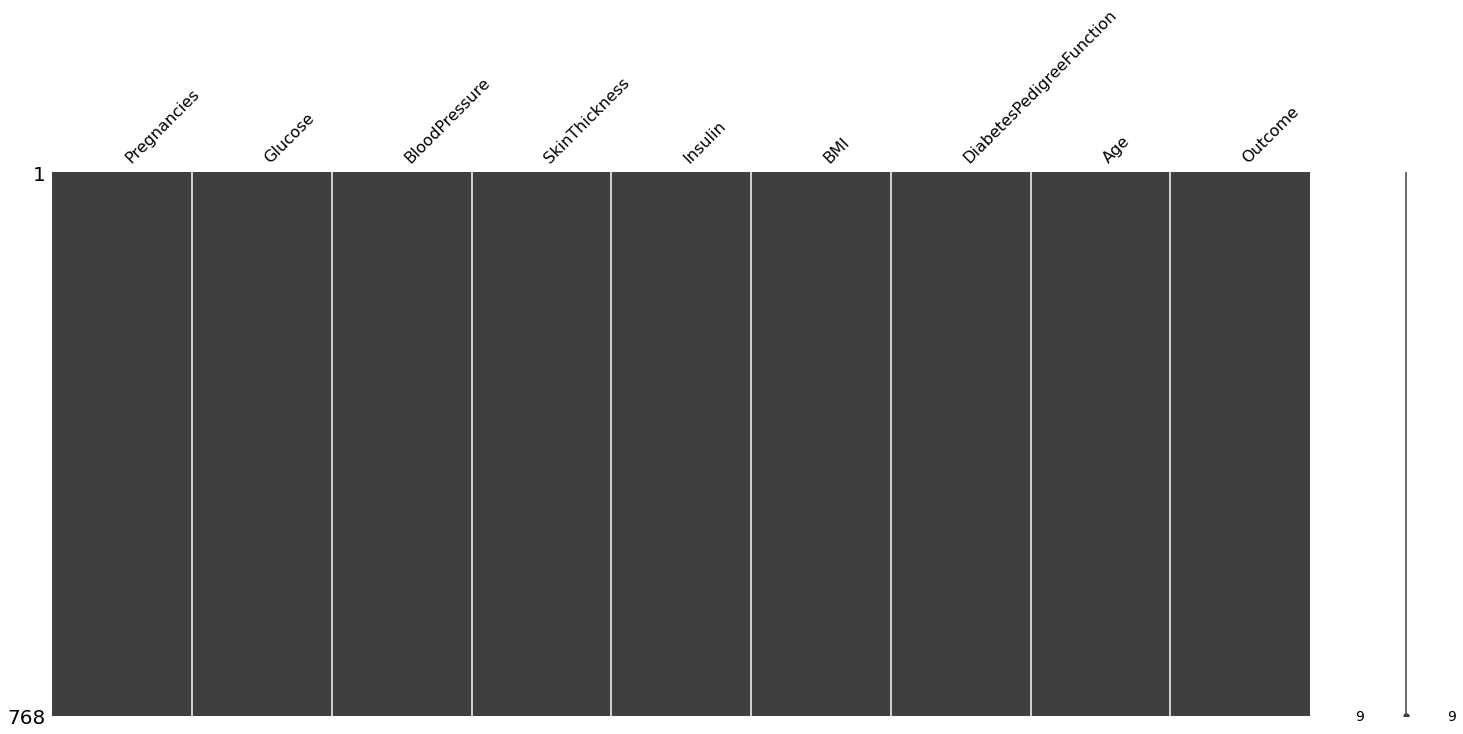

In [309]:
msno.matrix(fulldata)

**Feature Selection**

In [310]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(fulldata.drop('Outcome',axis=1),fulldata['Outcome'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(fulldata.drop('Outcome',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,Glucose,228.278996
5,BMI,81.287147
7,Age,47.944757
0,Pregnancies,39.106100
6,DiabetesPedigreeFunction,27.135876
4,Insulin,12.103615
2,BloodPressure,9.961146
3,SkinThickness,4.118049


In [311]:
fulldata.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.479158
BMI                         0.309739
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
Insulin                     0.124721
BloodPressure               0.113301
SkinThickness               0.073125
Name: Outcome, dtype: float64

In [312]:
#fulldata.drop('BloodPressure', axis=1, inplace=True)
fulldata.drop('SkinThickness', axis=1, inplace=True)
#fulldata.drop('Insulin', axis=1, inplace=True)
#fulldata.drop('xx', axis=1, inplace=True)

In [313]:
fulldata

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,0.0,30.1,0.349,47.0,1


In [314]:
fulldata.nunique()

Pregnancies                  15
Glucose                     136
BloodPressure                42
Insulin                     157
BMI                         242
DiabetesPedigreeFunction    490
Age                          47
Outcome                       2
dtype: int64

In [315]:
fulldata.shape

(768, 8)

**Import the independent and dependent variable**

In [316]:
xx = fulldata.drop('Outcome', axis=1)
yy = fulldata['Outcome']

In [317]:
print(xx.shape), print(yy.shape)

(768, 7)
(768,)


(None, None)

In [318]:
print(yy.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


**Handling Imbalanced Data**

In [319]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(xx, yy)
print(X_res.shape), print(y_res.shape)

(1000, 7)
(1000,)


(None, None)

In [320]:
print(y_res.value_counts())

1    500
0    500
Name: Outcome, dtype: int64


In [321]:
X_res

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,0.0,33.6,0.627,50.0
1,1.0,85.0,66,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0.0,23.3,0.672,32.0
3,1.0,89.0,66,94.0,28.1,0.167,21.0
4,0.0,137.0,40,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...
995,3.0,141.0,35,0.0,30.0,0.761,27.0
996,8.0,143.0,66,0.0,34.9,0.129,41.0
997,1.0,149.0,68,127.0,29.3,0.349,42.0
998,13.5,100.0,78,184.0,36.6,0.412,46.0


**Feature Scaling**

In [322]:
sc = StandardScaler()
X_res = sc.fit_transform(X_res)
X_res

array([[ 0.5222985 ,  0.75738379,  0.06856627, ...,  0.13885322,
         0.53024637,  1.39421748],
       [-0.90163416, -1.27864843, -0.34614907, ..., -0.8730911 ,
        -0.40560219, -0.26655379],
       [ 1.09187157,  1.8885128 , -0.48438752, ..., -1.35015057,
         0.68283038, -0.17914477],
       ...,
       [-0.90163416,  0.78970176, -0.20791063, ..., -0.48276972,
        -0.4123837 ,  0.69494537],
       [ 2.6581975 , -0.79387886,  0.48328161, ...,  0.57254364,
        -0.1987661 ,  1.04458143],
       [ 1.3766581 ,  0.88665567,  0.48328161, ...,  0.2255913 ,
         1.43218738, -0.09173576]])

**Training and Testing using K-Fold Cross Validation**

**Logistic Regression**

In [323]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

stratifiedkf=StratifiedKFold(n_splits=10)
score1=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score1))
print("Average Cross Validation score :{}".format(score1.mean()))
accuracy1=score1.mean()
#print(accuracy1)

Cross Validation Scores are [0.72 0.8  0.7  0.69 0.79 0.69 0.77 0.77 0.76 0.74]
Average Cross Validation score :0.743


Text(0, 0.5, 'Accuracy Rate')

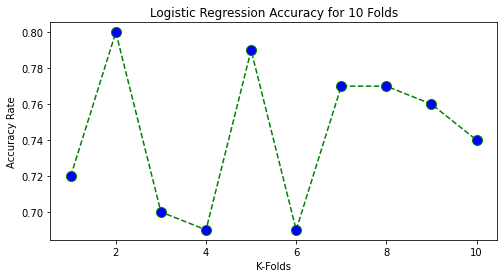

In [324]:
pltacc1=np.asarray(score1)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Logistic Regression Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**SVM**

In [325]:
from sklearn.svm import SVC
classifier = SVC()

stratifiedkf=StratifiedKFold(n_splits=10)
score2=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score2))
print("Average Cross Validation score :{}".format(score2.mean()))
accuracy2=score2.mean()
#print(accuracy2)

Cross Validation Scores are [0.7  0.85 0.72 0.7  0.83 0.76 0.84 0.85 0.83 0.82]
Average Cross Validation score :0.79


In [326]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
classifier = SVC()

param_grid_svc = {'C':[0.001, 0.01, 0.1, 0.5, 1],'gamma':['scale', 'auto']}
grid_svc_model = GridSearchCV(classifier, param_grid=param_grid_svc)

stratifiedkf=StratifiedKFold(n_splits=10)
score2=cross_val_score(grid_svc_model,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score2))
print("Average Cross Validation score :{}".format(score2.mean()))
accuracy2=score2.mean()
#print(accuracy2)

Cross Validation Scores are [0.7  0.85 0.72 0.7  0.83 0.76 0.84 0.85 0.83 0.82]
Average Cross Validation score :0.79


Text(0, 0.5, 'Accuracy Rate')

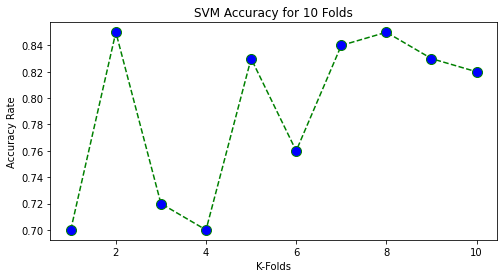

In [327]:
pltacc2=np.asarray(score2)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc2, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('SVM Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**KNN**

In [328]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

stratifiedkf=StratifiedKFold(n_splits=10)
score3=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score3))
print("Average Cross Validation score :{}".format(score3.mean()))
accuracy3=score3.mean()
#print(accuracy3)

Cross Validation Scores are [0.8  0.87 0.8  0.78 0.81 0.87 0.88 0.91 0.87 0.92]
Average Cross Validation score :0.8510000000000002


Text(0, 0.5, 'Accuracy Rate')

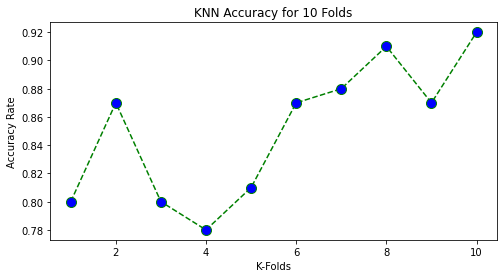

In [329]:
pltacc3=np.asarray(score3)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc3, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Naive Bayes**

In [330]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

stratifiedkf=StratifiedKFold(n_splits=10)
score4=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score4))
print("Average Cross Validation score :{}".format(score4.mean()))
accuracy4=score4.mean()
#print(accuracy4)

Cross Validation Scores are [0.65 0.7  0.66 0.66 0.75 0.69 0.71 0.73 0.71 0.66]
Average Cross Validation score :0.692


Text(0, 0.5, 'Accuracy Rate')

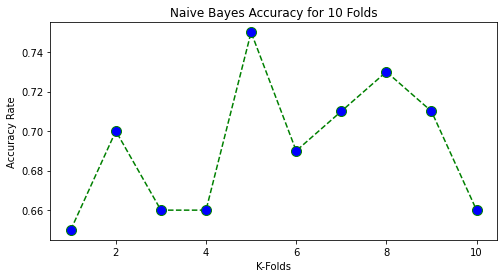

In [331]:
pltacc4=np.asarray(score4)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc4, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Naive Bayes Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Decision Tree**

In [332]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=25)

stratifiedkf=StratifiedKFold(n_splits=10)
score5=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score5))
print("Average Cross Validation score :{}".format(score5.mean()))
accuracy5=score5.mean()
#print(accuracy5)

Cross Validation Scores are [0.79 0.84 0.77 0.72 0.8  0.89 0.93 0.87 0.88 0.92]
Average Cross Validation score :0.841


Text(0, 0.5, 'Accuracy Rate')

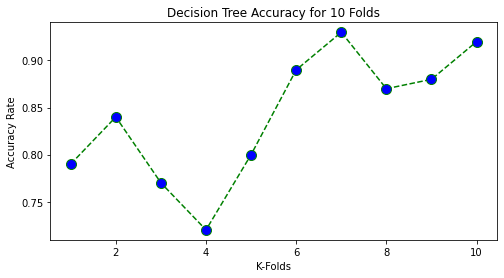

In [333]:
pltacc5=np.asarray(score5)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc5, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Decision Tree Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

In [334]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

stratifiedkf=StratifiedKFold(n_splits=10)
score6=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score6))
print("Average Cross Validation score :{}".format(score6.mean()))
accuracy6=score6.mean()
#print(accuracy6)

Cross Validation Scores are [0.73 0.86 0.75 0.73 0.88 0.79 0.9  0.85 0.83 0.86]
Average Cross Validation score :0.818


**Random Forest**

In [371]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

stratifiedkf=StratifiedKFold(n_splits=10)
score6=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score6))
print("Average Cross Validation score :{}".format(score6.mean()))
accuracy6=score6.mean()
#print(accuracy6)

Cross Validation Scores are [0.81 0.9  0.78 0.75 0.89 0.89 0.95 0.95 0.89 0.91]
Average Cross Validation score :0.8719999999999999


Text(0, 0.5, 'Accuracy Rate')

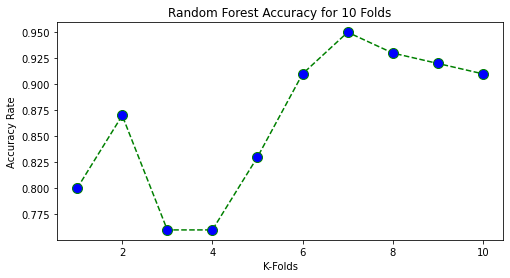

In [336]:
pltacc6=np.asarray(score6)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc6, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Ensemble Method (3 Folds)**

In [372]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
eclf = VotingClassifier(estimators=[('DT', clf1), ('KNN', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=3)
score73=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score73))
print("Average Cross Validation score :{}".format(score73.mean()))
accuracy73=score73.mean()
#print(accuracy73)

Cross Validation Scores are [0.79041916 0.78978979 0.95795796]
Average Cross Validation score :0.8460556364747981


**Ensemble Method (5 Folds)**

In [373]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(random_state = 0)
eclf = VotingClassifier(estimators=[('DT', clf1), ('KNN', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=5)
score75=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score75))
print("Average Cross Validation score :{}".format(score75.mean()))
accuracy75=score75.mean()
#print(accuracy75)

Cross Validation Scores are [0.84  0.745 0.88  0.95  0.955]
Average Cross Validation score :0.874


**Ensemble Method (7 Folds)**

In [374]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(random_state = 0)
eclf = VotingClassifier(estimators=[('DT', clf1), ('KNN', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=7)
score77=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score77))
print("Average Cross Validation score :{}".format(score77.mean()))
accuracy77=score77.mean()
#print(accuracy77)

Cross Validation Scores are [0.81818182 0.79020979 0.81818182 0.86713287 0.91608392 0.97902098
 0.95070423]
Average Cross Validation score :0.8770736305947574


**Ensemble Method (10 Folds)**

In [375]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(random_state = 0)
eclf = VotingClassifier(estimators=[('DT', clf1), ('KNN', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=10)
score710=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score710))
print("Average Cross Validation score :{}".format(score710.mean()))
accuracy710=score710.mean()
#print(accuracy710)

Cross Validation Scores are [0.8  0.88 0.77 0.75 0.84 0.94 0.97 0.95 0.92 0.99]
Average Cross Validation score :0.881


Text(0, 0.5, 'Accuracy Rate')

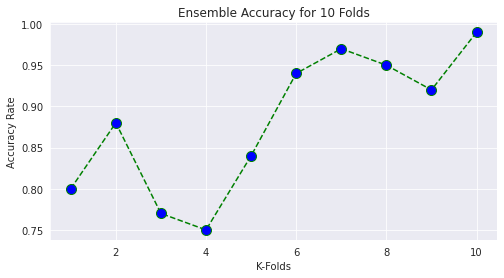

In [378]:
pltacc710=np.asarray(score710)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc710, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Ensemble Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Create visualization for all model with their Accuracy**

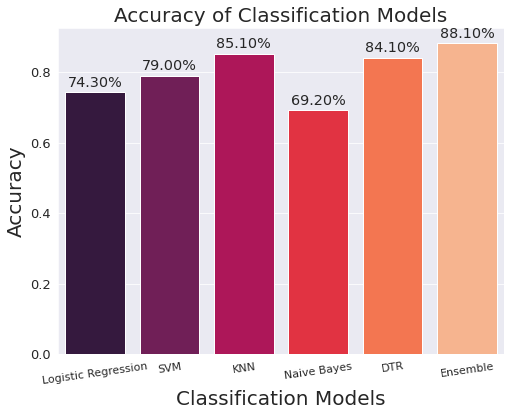

In [377]:
mylist=[]
mylist2=[]
mylist.append(accuracy1)
mylist2.append("Logistic Regression")
mylist.append(accuracy2)
mylist2.append("SVM")
mylist.append(accuracy3)
mylist2.append("KNN")
mylist.append(accuracy4)
mylist2.append("Naive Bayes")
mylist.append(accuracy5)
mylist2.append("DTR")
#mylist.append(accuracy6)
#mylist2.append("Random Forest")
mylist.append(accuracy710)
mylist2.append("Ensemble")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()